# Recursive Chunking

In [10]:
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import Chroma
from langchain.embeddings import OpenAIEmbeddings
import matplotlib.pyplot as plt
import os

os.chdir('../')


Read fiqa dataset

In [2]:
with open("fiqa_dataset/corpus.txt") as f:
    fiqa_corpus = f.read()

### Create Chunks with chunksize = 1000 and chunk_overlap = 100

In [4]:
text_splitter = RecursiveCharacterTextSplitter(
    separators = [".", "\n", "\n\n"],
    chunk_size=1000,
    chunk_overlap=100,
    length_function=len,
    is_separator_regex=False
)

texts = text_splitter.create_documents([fiqa_corpus])

Plot distribution of chunksizes

Number of Chunks:  49811
Length of Chunks:  [7779, 5419, 3331, 3329, 2440, 2242, 2199, 1712, 1648, 1504, 1326, 1283, 1239, 1228, 1226, 1209, 1206, 1145, 1095, 1087, 1064, 1042, 1036, 1030, 1008, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1

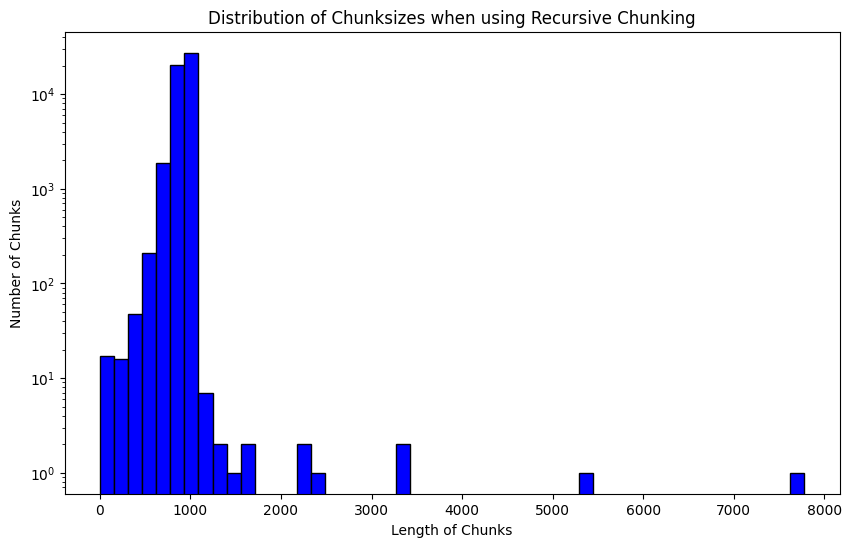

In [9]:
print('Number of Chunks: ', len(texts))

length_of_chunks = []
for doc in texts:
    length_of_chunks.append(len(doc.page_content))

length_of_chunks.sort(reverse=True)

print('Length of Chunks: ', length_of_chunks)

plt.figure(figsize=(10, 6))  
plt.hist(length_of_chunks, bins=50, color='blue', edgecolor='black')
plt.yscale('log')

plt.title('Distribution of Chunksizes when using Recursive Chunking')
plt.xlabel('Length of Chunks')
plt.ylabel('Number of Chunks')

plt.show()


Save Chunks into vectorstore

In [ ]:
embedding_function = OpenAIEmbeddings(model='text-embedding-3-small')

vectorstore_1000 = Chroma.from_documents(
    texts, 
    embedding_function,
    persist_directory='../vectorstores/recursive_size_1000'
)

In [7]:
import sys
import os

# Add the parent directory to the sys.path
sys.path.append(os.path.abspath(os.path.join('..')))

from rag import Rag
from evaluator import RagEvaluator

/home/dabr/code/langchain-rag-eval/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Evaluation with GPT-4o as Judge
- Time of Evaluation = 18:38 min
- Cost for evaluation = ~4$ 

In [2]:
recursive_1000_rag = Rag(chunkingstrategy='recursive_size_1000', llm='gpt-3.5-turbo-0125', embedding='text-embedding-3-small')
recursive_1000_eval = RagEvaluator(rag=recursive_1000_rag, eval_llm='gpt-4o', embedding_function='text-embedding-3-small')

passing column names as 'ground_truths' is deprecated and will be removed in the next version, please use 'ground_truth' instead. Note that `ground_truth` should be of type string and not Sequence[string] like `ground_truths`


Dataset({
    features: ['question', 'answer', 'contexts', 'ground_truths'],
    num_rows: 18
})


Evaluating: 100%|██████████| 72/72 [02:41<00:00,  2.24s/it]


Dataset({
    features: ['question', 'answer', 'contexts', 'ground_truths'],
    num_rows: 18
})


passing column names as 'ground_truths' is deprecated and will be removed in the next version, please use 'ground_truth' instead. Note that `ground_truth` should be of type string and not Sequence[string] like `ground_truths`
Evaluating: 100%|██████████| 72/72 [01:33<00:00,  1.30s/it]
passing column names as 'ground_truths' is deprecated and will be removed in the next version, please use 'ground_truth' instead. Note that `ground_truth` should be of type string and not Sequence[string] like `ground_truths`


Dataset({
    features: ['question', 'answer', 'contexts', 'ground_truths'],
    num_rows: 18
})


Evaluating: 100%|██████████| 72/72 [01:42<00:00,  1.42s/it]
passing column names as 'ground_truths' is deprecated and will be removed in the next version, please use 'ground_truth' instead. Note that `ground_truth` should be of type string and not Sequence[string] like `ground_truths`


Dataset({
    features: ['question', 'answer', 'contexts', 'ground_truths'],
    num_rows: 18
})


Evaluating: 100%|██████████| 72/72 [01:46<00:00,  1.48s/it]
passing column names as 'ground_truths' is deprecated and will be removed in the next version, please use 'ground_truth' instead. Note that `ground_truth` should be of type string and not Sequence[string] like `ground_truths`


Dataset({
    features: ['question', 'answer', 'contexts', 'ground_truths'],
    num_rows: 18
})


Evaluating: 100%|██████████| 72/72 [01:51<00:00,  1.55s/it]


In [ ]:
result = recursive_1000_eval.get_mean_result()
print(result)

**Evaluation result**

{'answer_relevancy': 0.6678, 'answer_correctness': 0.2087, 'context_recall': 0.306, 'context_relevancy': 0.1178}

#### Evaluation with GPT-3.5-turbo as Judge 
- Time of Evaluation = 5:37 min

In [ ]:
recursive_1000_rag = Rag(chunkingstrategy='recursive_size_1000', llm='gpt-3.5-turbo-0125', embedding='text-embedding-3-small')
recursive_1000_eval = RagEvaluator(rag=recursive_1000_rag, eval_llm='gpt-3.5-turbo-0125', embedding_function='text-embedding-3-small')

In [3]:
result = recursive_1000_eval.get_mean_result()
print(result)

{'answer_relevancy': 0.5402, 'answer_correctness': 0.3028, 'context_recall': 0.3995, 'context_relevancy': 0.0667}


**Evaluation result**

{'answer_relevancy': 0.5402, 'answer_correctness': 0.3028, 'context_recall': 0.3995, 'context_relevancy': 0.0667}

### Create Chunks with chunksize = 1500 and chunkoverlap = 300

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(
    separators = [".", "\n", "\n\n"],
    chunk_size=1500,
    chunk_overlap=300,
    length_function=len,
    is_separator_regex=False
)

texts = text_splitter.create_documents([fiqa_corpus])

embedding_function = OpenAIEmbeddings(model='text-embedding-3-small')

vectorstore = Chroma.from_documents(
    texts, 
    embedding_function,
    persist_directory='../vectorstores/recursive_size_1500'
)

#### Evaluation with GPT-3.5-turbo as Judge 

In [8]:
recursive_1500_rag = Rag(chunkingstrategy='recursive_size_1500', llm='gpt-3.5-turbo-0125', embedding='text-embedding-3-small')
recursive_1500_eval = RagEvaluator(rag=recursive_1500_rag, eval_llm='gpt-3.5-turbo-0125', embedding_function='text-embedding-3-small')

passing column names as 'ground_truths' is deprecated and will be removed in the next version, please use 'ground_truth' instead. Note that `ground_truth` should be of type string and not Sequence[string] like `ground_truths`
Evaluating: 100%|██████████| 72/72 [01:11<00:00,  1.00it/s]
passing column names as 'ground_truths' is deprecated and will be removed in the next version, please use 'ground_truth' instead. Note that `ground_truth` should be of type string and not Sequence[string] like `ground_truths`
Evaluating: 100%|██████████| 72/72 [01:59<00:00,  1.67s/it]
passing column names as 'ground_truths' is deprecated and will be removed in the next version, please use 'ground_truth' instead. Note that `ground_truth` should be of type string and not Sequence[string] like `ground_truths`
Evaluating: 100%|██████████| 72/72 [01:54<00:00,  1.59s/it]
passing column names as 'ground_truths' is deprecated and will be removed in the next version, please use 'ground_truth' instead. Note that `g

In [ ]:
result_of_1500 = recursive_1500_eval.get_mean_result()
print(result_of_1500)

**Evaluation result**

{'answer_relevancy': 0.485, 'answer_correctness': 0.2885, 'context_recall': 0.3559, 'context_relevancy': 0.0759}

### Chunk_size = 2000 & Chunk_overlap = 400

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(
    separators = [".", "\n", "\n\n"],
    chunk_size=2000,
    chunk_overlap=400,
    length_function=len,
    is_separator_regex=False
)

texts = text_splitter.create_documents([fiqa_corpus])

embedding_function = OpenAIEmbeddings(model='text-embedding-3-small')

vectorstore_2000 = Chroma.from_documents(
    texts, 
    embedding_function,
    persist_directory='../vectorstores/recursive_size_2000'
)

#### Evaluation with GPT-3.5-turbo as Judge

In [12]:
import sys
import os

# Add the parent directory to the sys.path
sys.path.append(os.path.abspath(os.path.join('..')))

from rag import Rag
from evaluator import RagEvaluator

In [ ]:
recursive_2000_rag = Rag(chunkingstrategy='recursive_size_2000', llm='gpt-3.5-turbo-0125', embedding='text-embedding-3-small')
recursive_2000_eval = RagEvaluator(rag=recursive_2000_rag, eval_llm='gpt-3.5-turbo-0125', embedding_function='text-embedding-3-small')

In [3]:
result_of_2000 = recursive_2000_eval.get_mean_result()
print(result_of_2000)

{'answer_relevancy': 0.4513, 'answer_correctness': 0.3229, 'context_recall': 0.3989, 'context_relevancy': 0.0573}


**Evaluation result**

{'answer_relevancy': 0.4513, 'answer_correctness': 0.3229, 'context_recall': 0.3989, 'context_relevancy': 0.0573}